In [2]:
#导入库
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import pandas as pd


In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
#对数据集的描述
#Survived:是否存活 0=否， 1=是
#Pclass : 座位等级
#Sex:性别
#Age:年龄
#Sibsp:船上的随行的亲属数
#Parch 登上船的父母/孩子
#Ticket 票号
#Fare:票价
#Cabin:客舱号
#Embarked:登船港口 C = 瑟堡，Q = 皇后镇，S = 南安普敦

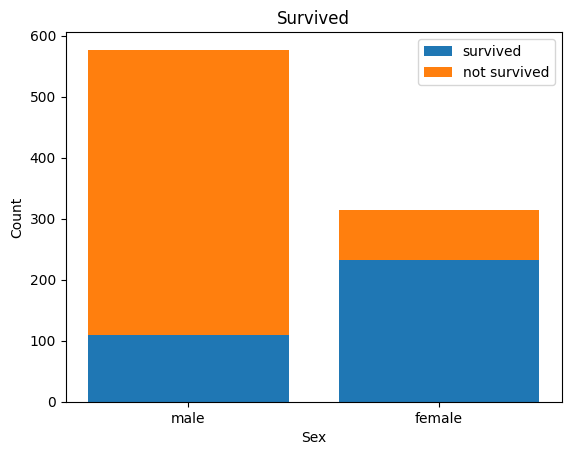

survived man 109, not survived 468
survived woman 233, not survived 81


In [5]:
import matplotlib.pyplot as plt

# 统计男性存活与未存活的数量
male_survived = train_data[(train_data['Sex'] == 'male') & (train_data['Survived'] == 1) ]
male_not_survived = train_data[(train_data['Sex'] == 'male') & (train_data['Survived'] == 0)]
male_survived_count = len(male_survived)
male_not_survived_count = len(male_not_survived)

# 统计女性存活与为存活数量
female_survived = train_data[(train_data['Sex'] == 'female') & (train_data['Survived'] == 1)]
female_not_survived = train_data[(train_data['Sex'] == 'female') & (train_data['Survived'] == 0)]
female_survived_count = len(female_survived)
female_not_survived_count = len(female_not_survived)

# 创建柱形图
labels = ['male', 'female']
survived_count = [male_survived_count, female_survived_count]
not_survived_count = [male_not_survived_count, female_not_survived_count]
total_counts = [male_survived_count + male_not_survived_count, female_not_survived_count + female_survived_count]

#
fig, ax = plt.subplots()
ax.bar(labels, survived_count, label='survived')
ax.bar(labels, not_survived_count, bottom=survived_count, label='not survived')
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_title('Survived')
ax.legend()
plt.savefig('Sex.png', dpi=300, bbox_inches='tight')
plt.show()

print("survived man {}, not survived {}".format(male_survived_count, male_not_survived_count))
print("survived woman {}, not survived {}".format(female_survived_count, female_not_survived_count))

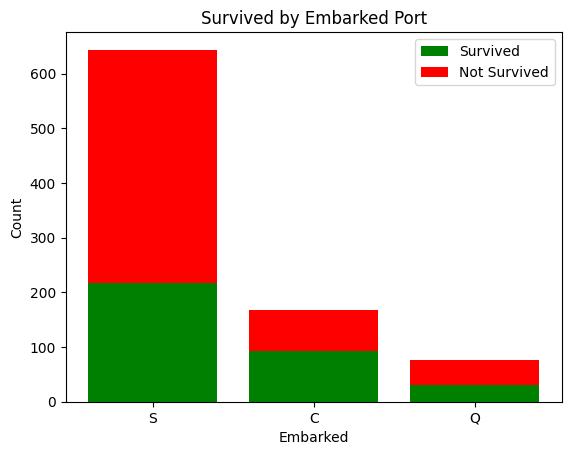

Embarked C: 存活率为 55.36%
Embarked Q: 存活率为 38.96%
Embarked S: 存活率为 33.70%


In [6]:
# 计算每个登船港口的幸存和未幸存人数
embarked_survived = train_data[train_data['Survived'] == 1]['Embarked'].value_counts()
embarked_not_survived = train_data[train_data['Survived'] == 0]['Embarked'].value_counts()
# 创建条形图
labels = ['S', 'C', 'Q']
survived_counts = [embarked_survived.get('S', 0), embarked_survived.get('C', 0), embarked_survived.get('Q', 0)]
survived_not_counts = [embarked_not_survived.get('S', 0), embarked_not_survived.get('C', 0), embarked_not_survived.get('Q',0)]

plt.bar(labels, survived_counts, color='green', label='Survived')
plt.bar(labels, survived_not_counts, bottom=survived_counts, color='red', label='Not Survived')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Survived by Embarked Port')
plt.legend()
plt.savefig('Embarked.png', dpi=300, bbox_inches='tight')
plt.show()

embarked_survived = train_data.groupby('Embarked')['Survived'].sum()
embarked_total = train_data.groupby('Embarked')['Survived'].count()
survival_rate = embarked_survived / embarked_total
for embarked, rate in survival_rate.items():
    print(f"Embarked {embarked}: 存活率为 {rate:.2%}")


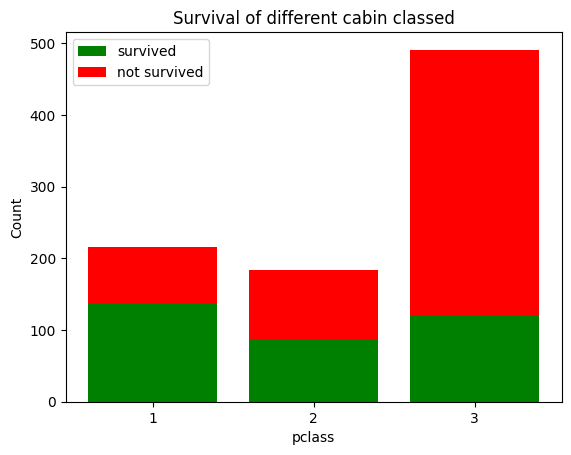

Pclass 1: 存活率为 62.96%
Pclass 2: 存活率为 47.28%
Pclass 3: 存活率为 24.24%


In [7]:
# 统计不同船舱等级的存活与未存活数量

pclass_survived = train_data[train_data['Survived'] == 1]['Pclass'].value_counts()
pclass_not_survived = train_data[train_data['Survived'] == 0]['Pclass'].value_counts()

# 作图
labels = ['1', '2', '3']
survived_count = [pclass_survived.get(1, 0), pclass_survived.get(2, 0), pclass_survived.get(3, 0)]
survived_not_count = [pclass_not_survived.get(1, 0), pclass_not_survived.get(2, 0), pclass_not_survived.get(3, 0)]

plt.bar(labels, survived_count, color='green', label='survived')
plt.bar(labels, survived_not_count, bottom=survived_count, color='red', label='not survived')

plt.xlabel('pclass')
plt.ylabel('Count')
plt.title('Survival of different cabin classed')
plt.legend()
plt.savefig("pclass.png", dpi=300, bbox_inches='tight')
plt.show()

pclass_survived = train_data.groupby('Pclass')['Survived'].sum()
pclass_total = train_data.groupby('Pclass')['Survived'].count()
survival_rate = pclass_survived / pclass_total
for pclass, rate in survival_rate.items():
    print(f"Pclass {pclass}: 存活率为 {rate:.2%}")

In [8]:
for cols in train_data.columns:
    count = 0
    null = 0
    for col in train_data[str(cols)].isnull():
        if col:
            null += 1
        else:
            count += 1
    rate = null / (count + null)
    print("{}'s missing rate is {:.2f}%".format(cols ,rate * 100))

PassengerId's missing rate is 0.00%
Survived's missing rate is 0.00%
Pclass's missing rate is 0.00%
Name's missing rate is 0.00%
Sex's missing rate is 0.00%
Age's missing rate is 19.87%
SibSp's missing rate is 0.00%
Parch's missing rate is 0.00%
Ticket's missing rate is 0.00%
Fare's missing rate is 0.00%
Cabin's missing rate is 77.10%
Embarked's missing rate is 0.22%


In [9]:
for cols in test_data.columns:
    count = 0
    null = 0
    for col in test_data[str(cols)].isnull():
        if col:
            null += 1
        else:
            count += 1
    rate = null / (count + null)
    print("{}'s missing rate is {:.2f}%".format(cols ,rate * 100))

PassengerId's missing rate is 0.00%
Pclass's missing rate is 0.00%
Name's missing rate is 0.00%
Sex's missing rate is 0.00%
Age's missing rate is 20.57%
SibSp's missing rate is 0.00%
Parch's missing rate is 0.00%
Ticket's missing rate is 0.00%
Fare's missing rate is 0.24%
Cabin's missing rate is 78.23%
Embarked's missing rate is 0.00%


In [10]:
# 对训练集与测试集进行测试
# 发现除Age, Cabin外还有Fare与Embarked缺失
date_to_drop = ["PassengerId", "Name", "Cabin", "Ticket"]
train = train_data
test = test_data
train.drop(columns=date_to_drop, inplace=True)
test.drop(columns=date_to_drop, inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
# 特征转换
Sex_map = {"male" : 0, "female" : 1}
Embarked_map = {"S" : 0, "Q" : 1, "C": 2}
age_mid = train['Age'].median()

train['Sex'] = train['Sex'].map(Sex_map)
train['Embarked'] = train['Embarked'].map(Embarked_map)
test['Sex'] = test['Sex'].map(Sex_map)
test['Embarked'] = test['Embarked'].map(Embarked_map)

index = 0
for flag in train['Age'].isnull():
    if flag:
        train.at[index, "Age"] = age_mid
    index += 1

index = 0
for flag in test['Age'].isnull():
    if flag:
        test.at[index, "Age"] = age_mid
    index += 1

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,2.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


In [12]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,1
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,1
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [13]:
# 填充其他缺失值
Embarked_mid = train['Embarked'].median()
Fare_mid = test['Fare'].median()
index = 0
for flag in train['Embarked'].isnull():
    if flag:
        train.at[index, 'Embarked'] = Embarked_mid
    index += 1
index = 0
for flag in test['Fare'].isnull():
    if flag :
        test.at[index, 'Fare'] = Fare_mid
    index += 1



In [14]:
# 归一化Age, Fare
from sklearn.preprocessing import MinMaxScaler

df = train[["Age", "Fare"]]
df2 = test[["Age", "Fare"]]
scaler = MinMaxScaler()
scaler_data = scaler.fit_transform(df)
scaler_data2 = scaler.fit_transform(df2)
df = pd.DataFrame(scaler_data, columns=["Age", "Fare"])
df2 = pd.DataFrame(scaler_data2, columns=["Age", "Fare"])
train['Age'] = df['Age']
train["Fare"] = df["Fare"]
test["Age"] = df2["Age"]
test["Fare"] = df2["Fare"]

In [15]:
one_hot_col = ["Pclass", "SibSp", "Parch", "Embarked"]
one_hot_train = pd.get_dummies(train, columns=one_hot_col)
one_hot_test = pd.get_dummies(test, columns=one_hot_col)


In [16]:
x_train = one_hot_train.drop("Survived", axis=1)
y_train = one_hot_train["Survived"]
x_train.head()

,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_0.0,Embarked_1.0,Embarked_2.0
0,0,0.271174,0.014151,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,1,0.472229,0.139136,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,0.321438,0.015469,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,1,0.434531,0.103644,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0.434531,0.015713,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [17]:
test = one_hot_test
test = test.drop("Parch_9", axis=1)
test = test.rename({"Embarked_0" :"Embarked_0.0", "Embarked_1":"Embarked_1.0", "Embarked_2" : "Embarked_2.0"})
test.head()

,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_0,Embarked_1,Embarked_2
0,0,0.452723,0.015282,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0.617566,0.013663,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,0.815377,0.018909,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0.353818,0.016908,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1,0.287881,0.023984,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [18]:
test.head()

,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_0,Embarked_1,Embarked_2
0,0,0.452723,0.015282,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0.617566,0.013663,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,0.815377,0.018909,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0.353818,0.016908,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1,0.287881,0.023984,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [19]:
from keras import models
from keras import layers
from keras import regularizers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10,kernel_regularizer=regularizers.l2(0.001), activation='relu', input_dim=23))
    model.add(layers.Dense(10,
    kernel_regularizer=regularizers.l2(0.001),
    activation='relu'))
    model.add(layers.Dense(10, kernel_regularizer=regularizers.l2(0.001),
    activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    return model

In [20]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [21]:
x_train = x_train.astype('float64')
y_train = y_train.astype('float64')
k = 5
num_val_samples = len(x_train) // k
num_epochs = 2000
all_acc_histories = []
all_loss_histories = []

for i in range(k):
    print('processing fold #', i + 1)
    val_data = x_train[i * num_val_samples : (i + 1) * num_val_samples]
    val_target = y_train[i * num_val_samples : (i + 1) * num_val_samples]

    part_train_data = np.concatenate([x_train[:i * num_val_samples], x_train[(i + 1) * num_val_samples :]], axis=0)
    part_target_data = np.concatenate([y_train[:i * num_val_samples], y_train[(i + 1) * num_val_samples :]], axis=0)

    model = build_model()
    history = model.fit(part_train_data, part_target_data, validation_data=(val_data, val_target), epochs=num_epochs, batch_size=16, verbose=0)
    all_acc_histories.append(history.history['acc'])
    all_loss_histories.append(history.history['loss'])

    model.save('model_fold_{}.h5'.format(i))

processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5


In [29]:
from keras.utils import plot_model
plot_model(model, to_file="model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


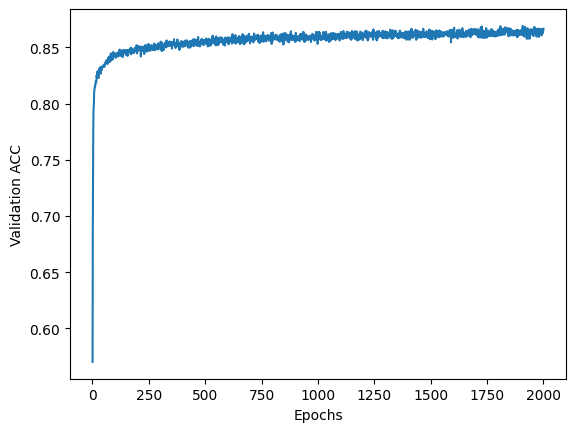

In [30]:
average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]

smooth_acc_history = smooth_curve(average_acc_history[5:])

plt.plot(range(1, len(average_acc_history) + 1), average_acc_history)
plt.xlabel("Epochs")
plt.ylabel("Validation ACC")
plt.savefig("Validation ACC.png", dpi=300, bbox_inches='tight')
plt.show()

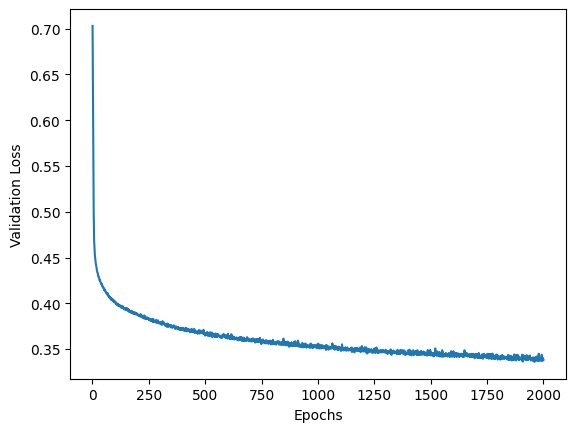

In [31]:
average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]

smooth_loss_history = smooth_curve(average_loss_history[5:])

plt.plot(range(1, len(average_loss_history) + 1), average_loss_history)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.savefig("Validation Loss.png", dpi=300, bbox_inches='tight')
plt.show()

In [32]:
model = models.load_model("model_fold_4.h5")
pred = model.predict(test)

14/14 [==============================] - 0s 620us/step


In [33]:
print(pred)

[[3.26202847e-02]
 [7.37980381e-02]
 [2.85474639e-02]
 [1.40915364e-01]
 [6.18730128e-01]
 [1.27297744e-01]
 [8.04979324e-01]
 [6.70336336e-02]
 [7.17093647e-01]
 [1.14020274e-03]
 [1.44291073e-01]
 [3.86756063e-01]
 [9.85221922e-01]
 [3.00953197e-05]
 [9.86390889e-01]
 [9.85356867e-01]
 [1.41110923e-02]
 [1.77788928e-01]
 [5.76117337e-01]
 [5.13765156e-01]
 [7.73208320e-01]
 [1.03557797e-03]
 [9.76979613e-01]
 [9.35315251e-01]
 [9.96256113e-01]
 [8.98688682e-04]
 [9.91078615e-01]
 [1.76407576e-01]
 [5.33646524e-01]
 [1.97242200e-02]
 [4.99387039e-04]
 [4.36367728e-02]
 [5.81756118e-04]
 [6.53836469e-04]
 [8.34465325e-01]
 [1.74515560e-01]
 [4.72516745e-01]
 [5.40072918e-01]
 [1.32585585e-01]
 [3.30196142e-01]
 [2.49242410e-03]
 [5.83743572e-01]
 [2.10827768e-01]
 [9.40266609e-01]
 [9.86341834e-01]
 [1.28637955e-01]
 [7.11977422e-01]
 [4.56513800e-02]
 [9.83649254e-01]
 [3.64954472e-01]
 [5.34383595e-01]
 [3.42187643e-01]
 [9.86840844e-01]
 [9.89150882e-01]
 [3.40341330e-01]
 [3.212534

In [34]:
threshold = 0.5
binary_pre =(pred > threshold).astype(int)

print(binary_pre, len(binary_pre))

[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]


In [35]:
end = []
for i in binary_pre:
    end.append(int(i))
    sub = []
submission = pd.read_csv("gender_submission.csv")
for i in submission["Survived"]:
    sub.append(i)

In [36]:
right = 0
for i in range(len(end)):
    if end[i] == sub[i]:
        right += 1
rate = right / len(end)

正确率：0.8516746411483254


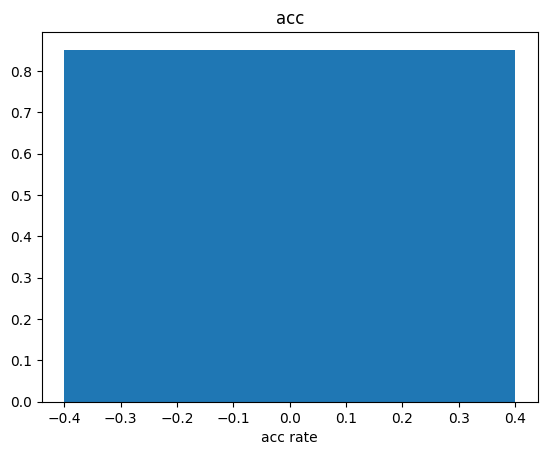

In [37]:
print("正确率：{}".format(rate))
plt.bar(0, rate)

plt.title("acc")
plt.xlabel("acc rate")
plt.savefig("acc.png")
plt.show()


Weight index: 0, Importance: 35.778202056884766
columns name Sex
Weight index: 6, Importance: 28.386240005493164
columns name SibSp_0
Weight index: 2, Importance: 19.612869262695312
columns name Fare
Weight index: 4, Importance: 16.68975257873535
columns name Pclass_2
Weight index: 5, Importance: 1.5306215286254883
columns name Pclass_3
Weight index: 1, Importance: 1.1085454225540161
columns name Age
Weight index: 3, Importance: 0.5762302875518799
columns name Pclass_1
Weight index: 7, Importance: 0.3475792109966278
columns name SibSp_1


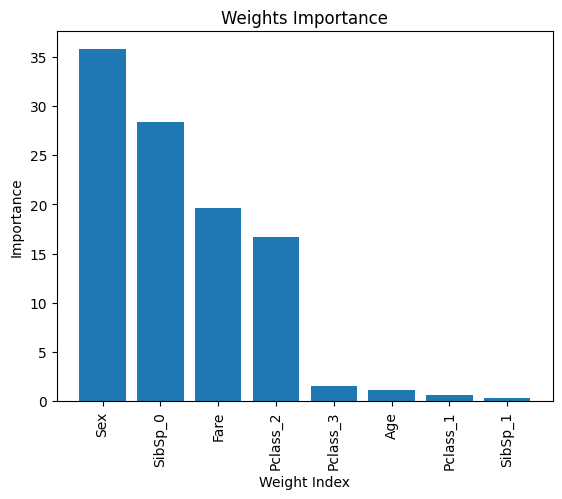

In [39]:
# 获取模型的权重
weights = model.get_weights()

# 计算每个权重张量的绝对值之和
weights_abs_sum = []
for i, w in enumerate(weights):
    weights_abs_sum.append(np.sum(np.abs(w)))
weights_abs_sum = np.array(weights_abs_sum)

# 根据权重的绝对值之和进行排序
sorted_indices = np.argsort(weights_abs_sum)[::-1]

# 打印权重的重要性
for i in sorted_indices:
    print(f"Weight index: {i}, Importance: {weights_abs_sum[i]}")
    print("columns name {}".format( test.columns[i]))

plt.figure()

# 设置x轴和y轴的数据
x = range(len(sorted_indices))
y = [weights_abs_sum[i] for i in sorted_indices]

# 绘制柱状图
plt.bar(x, y)

# 设置x轴标签
plt.xticks(x, [test.columns[i] for i in sorted_indices], rotation='vertical')

# 添加标题和标签
plt.title("Weights Importance")
plt.xlabel("Weight Index")
plt.ylabel("Importance")
plt.savefig("Weight.png")
# 显示图形
plt.show()

